In [1]:
import pandas as pd
import nltk
import spacy
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\infor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\infor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
# Load the excel file
df = pd.read_excel('seeds2.xlsx')
df

,Customer Name,Gender,Comment,Website,Seed Type,Label,Date,Sentiment
0,"Natraj B, Bangalore",1,good quality,Bigbasket,Pumpkin Seeds,-1,2024-02-12,1
1,"Sandhya Rani, Bangalore",0,"become black , bad smell , bad quality , old s...",Bigbasket,Sunflower Seeds,-1,2024-06-11,-1
2,Shovan Chakraborty,1,good,Amazon,Flax Seeds,0,2023-08-10,1
3,Placeholder,-1,nice,Amazon,Seasame Seeds,1,2024-06-30,1
4,Vinit Ranjan,1,"good product , nicely packed - even check auth...",Flipkart,Pumpkin Seeds,1,2024-01-29,1
...,...,...,...,...,...,...,...,...
2976,Krishna Pakala,1,good product,Bigbasket,Flax Seeds,1,2024-06-19,1
2977,vivek mishra,1,using chemical colour,Amazon,Seasame Seeds,-1,2023-07-27,0
2978,Vineesh Peralassery,1,super product healthy food,Flipkart,Pumpkin Seeds,1,2023-12-14,1
2979,sourabh bisht,1,quality much good .seeds smalli buy better qua...,Amazon,Flax Seeds,-1,2023-12-30,1


In [18]:
from tabulate import tabulate

# Combine all comments into a single string
text_data = ' '.join(df['Comment'].astype(str).tolist()) # Assuming the column is named 'Comment'

# Step 1: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower()) # Tokenize and lower case
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)

print("Top 10 words:")
print(tabulate(top_10_words, headers=['Word', 'Count'], tablefmt='grid'))

Top 10 words:
+---------+---------+
| Word    |   Count |
+=========+=========+
| good    |    1469 |
+---------+---------+
| product |     902 |
+---------+---------+
| quality |     740 |
+---------+---------+
| seed    |     707 |
+---------+---------+
| nice    |     286 |
+---------+---------+
| taste   |     260 |
+---------+---------+
| fresh   |     175 |
+---------+---------+
| like    |     148 |
+---------+---------+
| chia    |     139 |
+---------+---------+
| buy     |     132 |
+---------+---------+


In [8]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 770.8 kB/s eta 0:00:17
      --------------------------------------- 0.2/12.8 MB 1.7 MB/s eta 0:00:08
     - -------------------------------------- 0.4/12.8 MB 2.1 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.8 MB 2.3 MB/s eta 0:00:06
     -- ------------------------------------- 0.7/12.8 MB 2.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 2.7 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/12.8 MB 3.0 MB/s eta 0:00:04
     --- ------------------------------------ 1.3/12.8 MB 3.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/12.8 MB 3.1 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.8 MB 3.2 MB

In [19]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Combine all comments into a single string
text_data = ' '.join(df['Comment'].astype(str).tolist())  # Assuming the column is named 'Comment'

# Step 2: Named Entity Recognition (NER)
doc = nlp(text_data)

# Extract named entities
named_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print the named entities in a table format
print("\nNamed Entities:")
print(tabulate(named_entities, headers=['Entity', 'Label'], tablefmt='grid'))


Named Entities:
+----------------------------------------+-------------+
| Entity                                 | Label       |
+========================================+=============+
| superfood chia lesser quantity         | PERSON      |
+----------------------------------------+-------------+
| first 3 month                          | DATE        |
+----------------------------------------+-------------+
| 7                                      | CARDINAL    |
+----------------------------------------+-------------+
| 3 month                                | DATE        |
+----------------------------------------+-------------+
| minimum 6th month                      | DATE        |
+----------------------------------------+-------------+
| expiry                                 | PERSON      |
+----------------------------------------+-------------+
| good.rahul                             | NORP        |
+----------------------------------------+-------------+
| first       

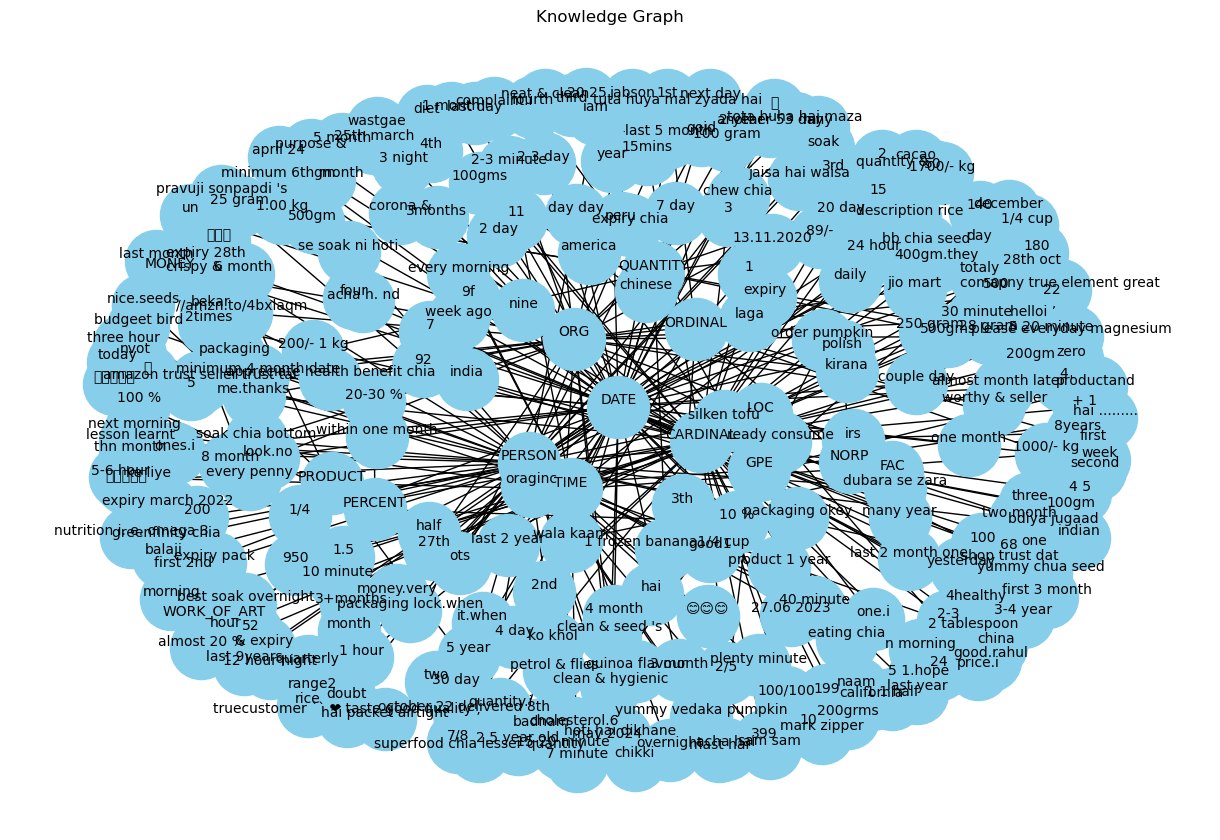

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'doc' is defined and contains entities
edges = []
for ent in doc.ents:
    edges.append((ent.text, ent.label_))

# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 4: Draw the knowledge graph
plt.figure(figsize=(12, 8))  # Increased figure size for better visibility

# Use a layout that helps reduce overlap
pos = nx.spring_layout(graph, k=0.5)  # Adjust 'k' for more or less spacing

# Draw nodes and edges
nx.draw(graph, pos, with_labels=False, node_color='skyblue', node_size=2000)

# Draw labels with an offset
labels = {node: node for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos, labels, font_size=10, font_color='black', verticalalignment='bottom')

plt.title('Knowledge Graph')
plt.axis('off')  # Turn off the axis
plt.show()

In [13]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 393.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 744.7 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.1 MB/s eta 0:00:01
   ----------------------------------- ---- 266.2/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


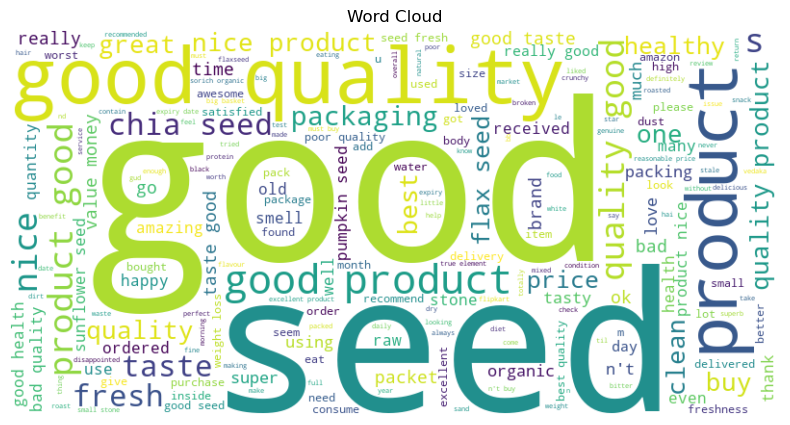

In [14]:
from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400,
background_color='white').generate(text_data)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [22]:
from nltk import ngrams
from tabulate import tabulate

# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)

# Print the top 10 bigrams in a table format
print("\nTop 10 Bigrams:")
print(tabulate(top_10_bigrams, headers=['Bigram', 'Count'], tablefmt='grid'))


Top 10 Bigrams:
+------------------------+---------+
| Bigram                 |   Count |
+========================+=========+
| ('good', 'quality')    |     294 |
+------------------------+---------+
| ('good', 'product')    |     242 |
+------------------------+---------+
| ('product', 'good')    |     177 |
+------------------------+---------+
| ('quality', 'good')    |     166 |
+------------------------+---------+
| ('good', 'good')       |     165 |
+------------------------+---------+
| ('chia', 'seed')       |     128 |
+------------------------+---------+
| ('nice', 'product')    |      84 |
+------------------------+---------+
| ('quality', 'product') |      81 |
+------------------------+---------+
| ('seed', 'good')       |      80 |
+------------------------+---------+
| ('flax', 'seed')       |      75 |
+------------------------+---------+


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Comment'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix:")
print(tfidf_df.head())


TF-IDF Matrix:
    00   06   10  100  1000  100g  100gm  100gms   11   12  ...   yr  yummy  \
0  0.0  0.0  0.0  0.0   0.0   0.0    0.0     0.0  0.0  0.0  ...  0.0    0.0   
1  0.0  0.0  0.0  0.0   0.0   0.0    0.0     0.0  0.0  0.0  ...  0.0    0.0   
2  0.0  0.0  0.0  0.0   0.0   0.0    0.0     0.0  0.0  0.0  ...  0.0    0.0   
3  0.0  0.0  0.0  0.0   0.0   0.0    0.0     0.0  0.0  0.0  ...  0.0    0.0   
4  0.0  0.0  0.0  0.0   0.0   0.0    0.0     0.0  0.0  0.0  ...  0.0    0.0   

   zara  zero  zinc  zip  ziplock  zipper  zyada   अच  
0   0.0   0.0   0.0  0.0      0.0     0.0    0.0  0.0  
1   0.0   0.0   0.0  0.0      0.0     0.0    0.0  0.0  
2   0.0   0.0   0.0  0.0      0.0     0.0    0.0  0.0  
3   0.0   0.0   0.0  0.0      0.0     0.0    0.0  0.0  
4   0.0   0.0   0.0  0.0      0.0     0.0    0.0  0.0  

[5 rows x 2232 columns]
